# 1. Data Loading

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from pycaret.regression import *



In [2]:
# Set up the display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Loading the data
df_train = pd.read_csv('train.csv/train.csv')
df_test = pd.read_csv('test.csv/test.csv')

# 2. Exploratory Data Analysis

Getting an overview of our datasets.

In [4]:
print(f'Rows and Columns of Train data:',df_train.shape)
print(f'Rows and Columns of Test data', df_test.shape)

Rows and Columns of Train data: (137, 43)
Rows and Columns of Test data (100000, 42)


In [5]:
df_train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [7]:
df_train.describe(include='all')

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137,137,137,137,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
unique,NaN,134,34,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,02/23/2010,İstanbul,Big Cities,FC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,78,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,68.000000,NaN,NaN,NaN,NaN,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,3.262774,5.299270,5.080292,1.416058,1.386861,1.941606,1.036496,1.941606,4.905109,4.547445,2.270073,2.226277,3.423358,1.372263,1.211679,1.470803,1.145985,3.222628,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,NaN,NaN,NaN,NaN,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,1.910767,1.941668,1.036527,2.729583,2.398677,3.505807,2.030679,3.300549,5.604467,3.708041,2.052630,1.230690,4.559609,2.304112,2.133179,2.612024,2.067039,2.308806,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,NaN,NaN,NaN,NaN,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,2.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,NaN,NaN,NaN,NaN,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,NaN,NaN,NaN,NaN,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,2.000000,2.000000,3.000000,1.000000,4.000000,5.000000,5.000000,3.000000,3.000000,5.000000,2.000000,2.000000,2.500000,2.000000,4.000000,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          100000 non-null  int64  
 1   Open Date   100000 non-null  object 
 2   City        100000 non-null  object 
 3   City Group  100000 non-null  object 
 4   Type        100000 non-null  object 
 5   P1          100000 non-null  int64  
 6   P2          100000 non-null  float64
 7   P3          100000 non-null  float64
 8   P4          100000 non-null  float64
 9   P5          100000 non-null  int64  
 10  P6          100000 non-null  int64  
 11  P7          100000 non-null  int64  
 12  P8          100000 non-null  int64  
 13  P9          100000 non-null  int64  
 14  P10         100000 non-null  int64  
 15  P11         100000 non-null  int64  
 16  P12         100000 non-null  int64  
 17  P13         100000 non-null  float64
 18  P14         100000 non-null  int64  
 19  P15

In [9]:
df_test.describe(include='all')

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
count,100000.000000,100000,100000,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
unique,NaN,310,57,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,07/10/2013,İstanbul,Other,FC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,645,34087,50728,57019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49999.500000,NaN,NaN,NaN,NaN,4.088030,4.428085,4.215325,4.396025,1.989590,2.881900,5.30051,4.93100,5.251380,5.458970,3.311720,5.061440,5.086630,1.280090,1.305530,1.747070,1.156880,1.708470,5.191120,4.57086,2.542380,2.430380,3.63998,1.234450,1.244110,1.279665,1.164440,3.233785,3.084000,2.083300,1.193330,1.942640,0.987430,2.108670,1.832830,1.968890,0.973500
std,28867.657797,NaN,NaN,NaN,NaN,2.812963,1.428865,0.842161,1.035827,1.065314,1.531429,2.17858,1.71849,1.702632,1.763601,2.068118,1.765383,0.979339,2.496782,2.166949,3.172012,2.432646,3.030527,5.785529,3.61243,2.526046,1.363184,4.71916,2.097457,2.084731,2.309640,2.179495,2.136694,1.783927,4.309479,2.307944,3.971298,1.534808,4.685414,3.228769,3.805773,1.677267
min,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.00000,1.00000,4.000000,4.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24999.750000,NaN,NaN,NaN,NaN,2.000000,3.750000,4.000000,4.000000,1.000000,2.000000,5.00000,4.00000,4.000000,5.000000,2.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.00000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49999.500000,NaN,NaN,NaN,NaN,3.000000,5.000000,4.000000,4.000000,2.000000,2.000000,5.00000,5.00000,5.000000,5.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.00000,2.000000,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74999.250000,NaN,NaN,NaN,NaN,4.000000,5.000000,4.000000,5.000000,2.000000,4.000000,5.00000,5.00000,5.000000,5.000000,4.000000,5.000000,5.000000,2.000000,2.000000,3.000000,2.000000,4.000000,5.000000,5.00000,3.000000,3.000000,4.00000,2.000000,2.000000,2.000000,2.000000,4.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000


There are 57 unique cities in the test dataset while there are only 34 in the train dataset.

There are 4 unique types in the test dataset while there are only 3 in the train dataset. 

This may post an issue as there might be unseen data in the test dataset. If that is really the case after further exploration, we will omit those features during model training. 

There are also 0 values in some features, this could mean they might be missing data or these particular features did not exist. 

In [10]:
# Finding out the sum of zeros in each column in df_train
(df_train == 0).sum()

Id             1
Open Date      0
City           0
City Group     0
Type           0
P1             0
P2             0
P3             1
P4             0
P5             0
P6             0
P7             0
P8             0
P9             0
P10            0
P11            0
P12            0
P13            0
P14           88
P15           88
P16           88
P17           88
P18           88
P19            0
P20            0
P21            0
P22            0
P23            0
P24           88
P25           88
P26           88
P27           89
P28            0
P29            2
P30           88
P31           88
P32           88
P33           88
P34           88
P35           88
P36           88
P37           88
revenue        0
dtype: int64

In [11]:
# Finidng out the sum of zeros in each column in df_test
(df_test == 0).sum()

Id                1
Open Date         0
City              0
City Group        0
Type              0
P1                0
P2                0
P3              318
P4                0
P5                0
P6                0
P7                0
P8                0
P9                0
P10               0
P11               0
P12               0
P13               0
P14           65734
P15           65772
P16           66094
P17           65792
P18           65980
P19               0
P20               0
P21               0
P22               0
P23               0
P24           65766
P25           65738
P26           65784
P27           66193
P28               0
P29            3083
P30           65596
P31           65566
P32           65787
P33           65791
P34           65832
P35           65776
P36           65662
P37           66029
dtype: int64

In [12]:
# Finding out the difference between the types of businesses in df_train and df_test
print(df_train['Type'].value_counts())
print(df_test['Type'].value_counts())

Type
FC    76
IL    60
DT     1
Name: count, dtype: int64
Type
FC    57019
IL    40447
DT     2244
MB      290
Name: count, dtype: int64


In [13]:
# Finding out the difference between the types of City Groups in df_train and df_test
print(df_train['City Group'].value_counts())
print(df_test['City Group'].value_counts())

City Group
Big Cities    78
Other         59
Name: count, dtype: int64
City Group
Other         50728
Big Cities    49272
Name: count, dtype: int64


In [14]:
# Define the columns to compare
columns_to_compare = ['City', 'City Group', 'Type']

# Standardize the data (e.g., lowercase and strip whitespace)
for col in columns_to_compare:
    df_train[col] = df_train[col].astype(str).str.lower().str.strip()
    df_test[col] = df_test[col].astype(str).str.lower().str.strip()

# Extract unique values
unique_train = {col: set(df_train[col].dropna().unique()) for col in columns_to_compare}
unique_test = {col: set(df_test[col].dropna().unique()) for col in columns_to_compare}

# Compare and display differences
comparison_summary = []

for col in columns_to_compare:
    train_unique = unique_train[col]
    test_unique = unique_test[col]
    
    train_not_in_test = train_unique - test_unique
    test_not_in_train = test_unique - train_unique
    
    # For 'City', display the count; for 'City Group' and 'Type', display the actual values
    if col == 'City':
        comparison_summary.append({
            'Column': col,
            'In df_train not in df_test': len(train_not_in_test),
            'In df_test not in df_train': len(test_not_in_train)
        })
    else:
        comparison_summary.append({
            'Column': col,
            'In df_train not in df_test': train_not_in_test if train_not_in_test else 'None',
            'In df_test not in df_train': test_not_in_train if test_not_in_train else 'None'
        })

# Create a summary DataFrame
summary_df = pd.DataFrame(comparison_summary)
summary_df


,Column,In df_train not in df_test,In df_test not in df_train
0,City,6,29
1,City Group,None,None
2,Type,None,{mb}


From the above we can conclude that there are 29 cities in test dataset that does not exist in the train dataset. 
Type 'MB' also does not exist in the train dataset, only in the test dataset.

Our model training should not include the features 'City' ideally. 

In [15]:
df_test.head()


,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,niğde,other,fc,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,konya,other,il,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,ankara,big cities,fc,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,kocaeli,other,il,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,afyonkarahisar,other,fc,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0


For standardization, we will convert all datatypes to float in columns 'P1' to 'P37' in both train and test datasets.

In [16]:
# Convert columns "P1 to P37 (columns 5 to 42) to float
df_train.iloc[:, 5:42] = df_train.iloc[:, 5:42].astype(float)
df_test.iloc[:, 5:42] = df_test.iloc[:, 5:42].astype(float)


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    float64
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    float64
 10  P6          137 non-null    float64
 11  P7          137 non-null    float64
 12  P8          137 non-null    float64
 13  P9          137 non-null    float64
 14  P10         137 non-null    float64
 15  P11         137 non-null    float64
 16  P12         137 non-null    float64
 17  P13         137 non-null    float64
 18  P14         137 non-null    float64
 19  P15         137 non-null    f

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          100000 non-null  int64  
 1   Open Date   100000 non-null  object 
 2   City        100000 non-null  object 
 3   City Group  100000 non-null  object 
 4   Type        100000 non-null  object 
 5   P1          100000 non-null  float64
 6   P2          100000 non-null  float64
 7   P3          100000 non-null  float64
 8   P4          100000 non-null  float64
 9   P5          100000 non-null  float64
 10  P6          100000 non-null  float64
 11  P7          100000 non-null  float64
 12  P8          100000 non-null  float64
 13  P9          100000 non-null  float64
 14  P10         100000 non-null  float64
 15  P11         100000 non-null  float64
 16  P12         100000 non-null  float64
 17  P13         100000 non-null  float64
 18  P14         100000 non-null  float64
 19  P15

With our domain expertise, it is common knowledge that the Age of the restaurants normally has some relevance to the revenue, hence we will be creating a 'Restaurant Age' feature.

In [19]:
# Convert 'Open Date' column to datetime format
df_train['Open Date'] = pd.to_datetime(df_train['Open Date'])
df_test['Open Date'] = pd.to_datetime(df_test['Open Date'])

# Use the year 2013 or the max 'Open Date' year in the data for calculating 'Restaurant Age'
max_year = df_train['Open Date'].dt.year.max()

# Set the reference date to the end of 2013 for consistency
reference_date = pd.to_datetime(f"{min(max_year, 2013)}-12-31")

# Recalculate the 'Restaurant Age' in years based on the reference date
df_train['Restaurant Age'] = (reference_date - df_train['Open Date']).dt.days/365.25
df_test['Restaurant Age'] = (reference_date - df_test['Open Date']).dt.days/365.25

# Display the updated 'Restaurant Age' column in train data
df_train[['Open Date', 'Restaurant Age']].head()


,Open Date,Restaurant Age
0,1999-07-17,14.458590
1,2008-02-14,5.878166
2,2013-03-09,0.813142
3,2012-02-02,1.911020
4,2009-05-09,4.646133


In [20]:
# Now perform one-hot encoding for 'Type'
df_train = pd.get_dummies(df_train, columns=['Type'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Type'], drop_first=True)

# Check if the test and train data have consistent features
missing_in_test = set(df_train.columns) - set(df_test.columns)
missing_in_train = set(df_test.columns) - set(df_train.columns)

missing_in_test, missing_in_train


({'revenue'}, {'Type_mb'})

In [21]:
# Add 'Type_encoded_mb' column to the train set for consistency, setting all values to 0 since 'mb' is not present in train data
df_train['Type_mb'] = 0

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              137 non-null    int64         
 1   Open Date       137 non-null    datetime64[ns]
 2   City            137 non-null    object        
 3   City Group      137 non-null    object        
 4   P1              137 non-null    float64       
 5   P2              137 non-null    float64       
 6   P3              137 non-null    float64       
 7   P4              137 non-null    float64       
 8   P5              137 non-null    float64       
 9   P6              137 non-null    float64       
 10  P7              137 non-null    float64       
 11  P8              137 non-null    float64       
 12  P9              137 non-null    float64       
 13  P10             137 non-null    float64       
 14  P11             137 non-null    float64       
 15  P12   

In [22]:
# Verify the alignment between train and test datasets
train_data_columns = set(df_train.columns)
test_data_columns = set(df_test.columns)

In [23]:
# Check if the test and train data have consistent features
missing_in_test = set(df_train.columns) - set(df_test.columns)
missing_in_train = set(df_test.columns) - set(df_train.columns)

missing_in_test, missing_in_train

({'revenue'}, set())

In [24]:
# Encode 'City Group'columns then drop the original column
df_train = pd.get_dummies(df_train, columns=['City Group'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['City Group'], drop_first=True)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                137 non-null    int64         
 1   Open Date         137 non-null    datetime64[ns]
 2   City              137 non-null    object        
 3   P1                137 non-null    float64       
 4   P2                137 non-null    float64       
 5   P3                137 non-null    float64       
 6   P4                137 non-null    float64       
 7   P5                137 non-null    float64       
 8   P6                137 non-null    float64       
 9   P7                137 non-null    float64       
 10  P8                137 non-null    float64       
 11  P9                137 non-null    float64       
 12  P10               137 non-null    float64       
 13  P11               137 non-null    float64       
 14  P12               137 non-

#### Visualizing an overview of the features. 

<Figure size 4000x1000 with 0 Axes>

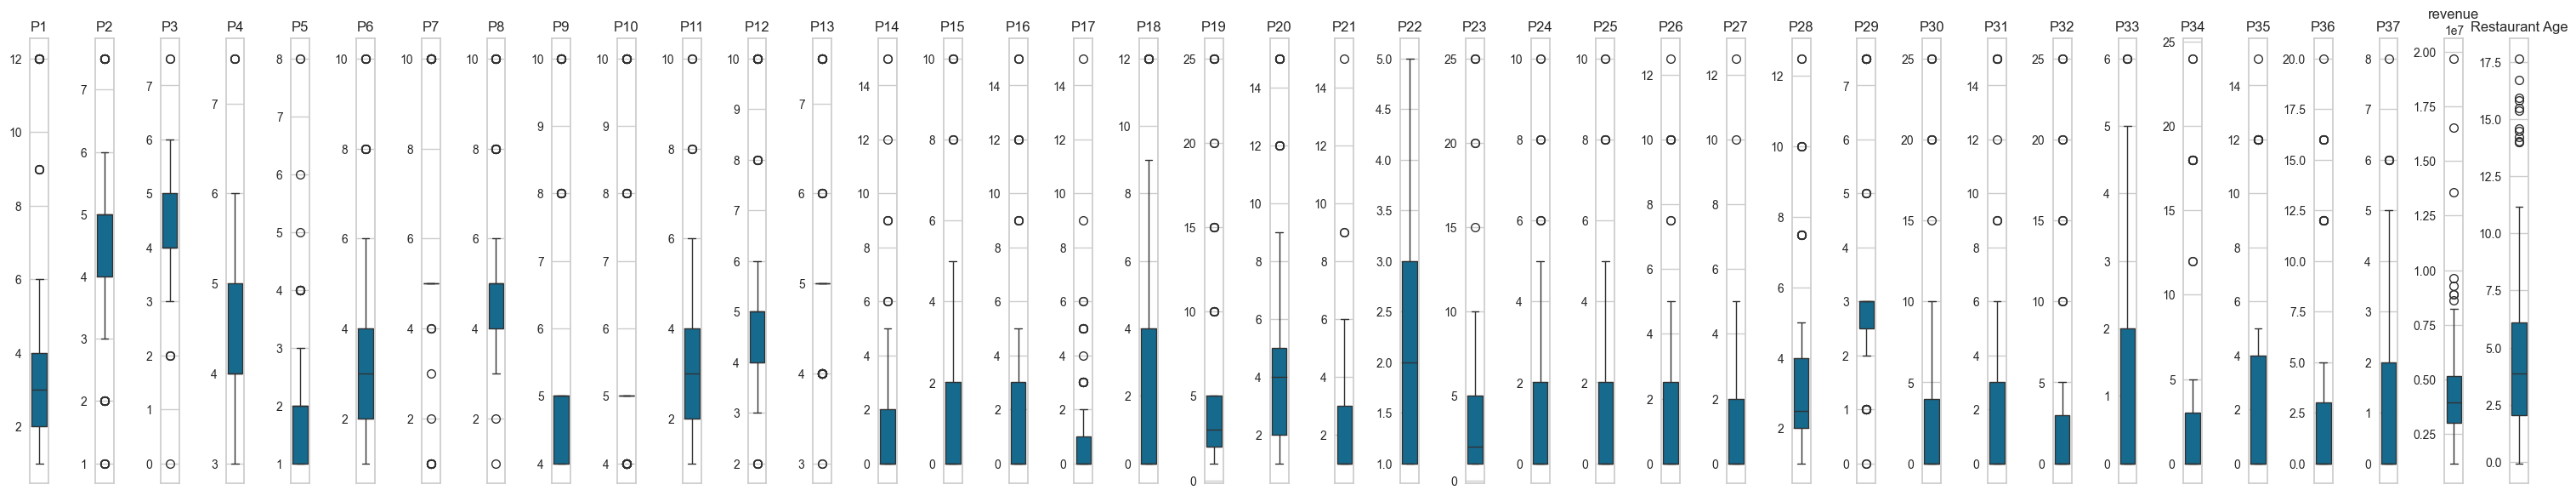

In [25]:
# Set up the matplotlib figure for feature distribution
plt.figure(figsize=(40, 10))

# Plotting distribution for a P1 to P37 features along with revenue to check for outliers
features_to_plot = df_train.columns[3:42]

fig, axs = plt.subplots(1, len(features_to_plot), figsize=(30, 6))
for i, feature in enumerate(features_to_plot):
    sns.boxplot(data=df_train, y=feature, ax=axs[i])
    axs[i].set_title(f'{feature}')
    axs[i].set_ylabel('')



plt.tight_layout()

plt.show()

From the above boxplots, there seems to be a few outliers across most features. <br>Looking further into the outliers to determine how to handle them. 


In [26]:
# Function to identify outliers using the IQR method
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Apply the function to all relevant numerical columns
numerical_columns = df_train.select_dtypes(include=['float64', 'int64']).columns

# Find the rows containing outliers across all numerical columns
outliers = pd.concat([find_outliers_iqr(df_train, col) for col in numerical_columns])

# Remove duplicates and count how many rows will be affected
affected_rows = outliers.drop_duplicates()

# Display the number of rows affected by removing outliers
affected_rows_count = affected_rows.shape[0]
print(f"Number of rows affected by removing outliers: {affected_rows_count}")


Number of rows affected by removing outliers: 94


There are too many rows affected if we choose to simply remove all outliers, hence we should find an alternative method when handling them later on.

Now we do an initial check for the relationship between the features and revenue.

In [27]:
import scipy.stats as stats

# Define features to plot (columns between 2 and 45, assuming that 'revenue' is one of them)
features_to_plot = df_train[df_train.columns[3:]]

# Compute the correlation matrix for the features against 'revenue'
corr_matrix = features_to_plot.corr()

# Sort the correlations with 'revenue' and select the top 10 correlated features (excluding 'revenue' itself)
top_10_features = corr_matrix['revenue'].abs().sort_values(ascending=False).head(11).index  # Include 'revenue'

# Create a list to hold results for the DataFrame
results = []

# Compute the Pearson correlation and p-values for the top 10 features and store in the list
for feature in top_10_features:
    if feature != 'revenue':  # Exclude the target itself
        corr, p_val = stats.pearsonr(df_train[feature], df_train['revenue'])
        results.append({'Feature': feature, 'Correlation': corr, 'P-Value': p_val})

# Convert the results into a DataFrame
correlation_pvalue_df = pd.DataFrame(results)

# Display the DataFrame with Feature, Correlation, and P-Value
correlation_pvalue_df



,Feature,Correlation,P-Value
0,Restaurant Age,0.325821,0.000102
1,City Group_other,-0.237403,0.005217
2,P2,0.191518,0.024967
3,P28,0.155534,0.069545
4,P6,0.139094,0.105011
5,P29,-0.114846,0.181437
6,P13,-0.105085,0.221670
7,Type_fc,0.100211,0.243968
8,P21,0.097411,0.257459
9,Type_il,-0.096696,0.260988


### Insights Garnered:
#####   1. Statistically Significant Features (P-value < 0.05):<br>
Restaurant Age:<br>
Correlation: 0.3258 (positive).<br>
P-Value: 0.0001, highly significant. <br>
Interpretation: *This is the strongest predictor. Older restaurants tend to generate higher revenue, and the positive correlation indicates that as the age of a restaurant increases, its revenue is likely to increase.*<br><br>

City Group_other:<br>
Correlation: -0.2374 (negative).<br>
P-Value: 0.0052, significant at the 5% level.<br>
Interpretation: *This negative correlation suggests that restaurants located in cities classified as "Other" have lower revenues compared to restaurants in "Big Cities" (which would be the reference category after one-hot encoding). The fact that it is statistically significant implies that city group is an important factor for revenue.*<br><br>

P2:<br>
Correlation: 0.1915 (positive).<br>
P-Value: 0.0250, statistically significant.<br>
Interpretation: *This feature has a moderate positive correlation with revenue, meaning that higher values of P2 are associated with higher revenues, though the effect is not as strong as Restaurant Age or City Group.*<br>

#####   2. Potentially Significant Features (P-value between 0.05 and 0.10):
P28:<br>
Correlation: 0.1555 (positive).<br>
P-Value: 0.0695, moderately significant.<br>
Interpretation: *Although it has a weaker correlation, this feature could still have some impact on revenue. It’s worth further exploration, especially when combined with other features.*

##### Distribution of features

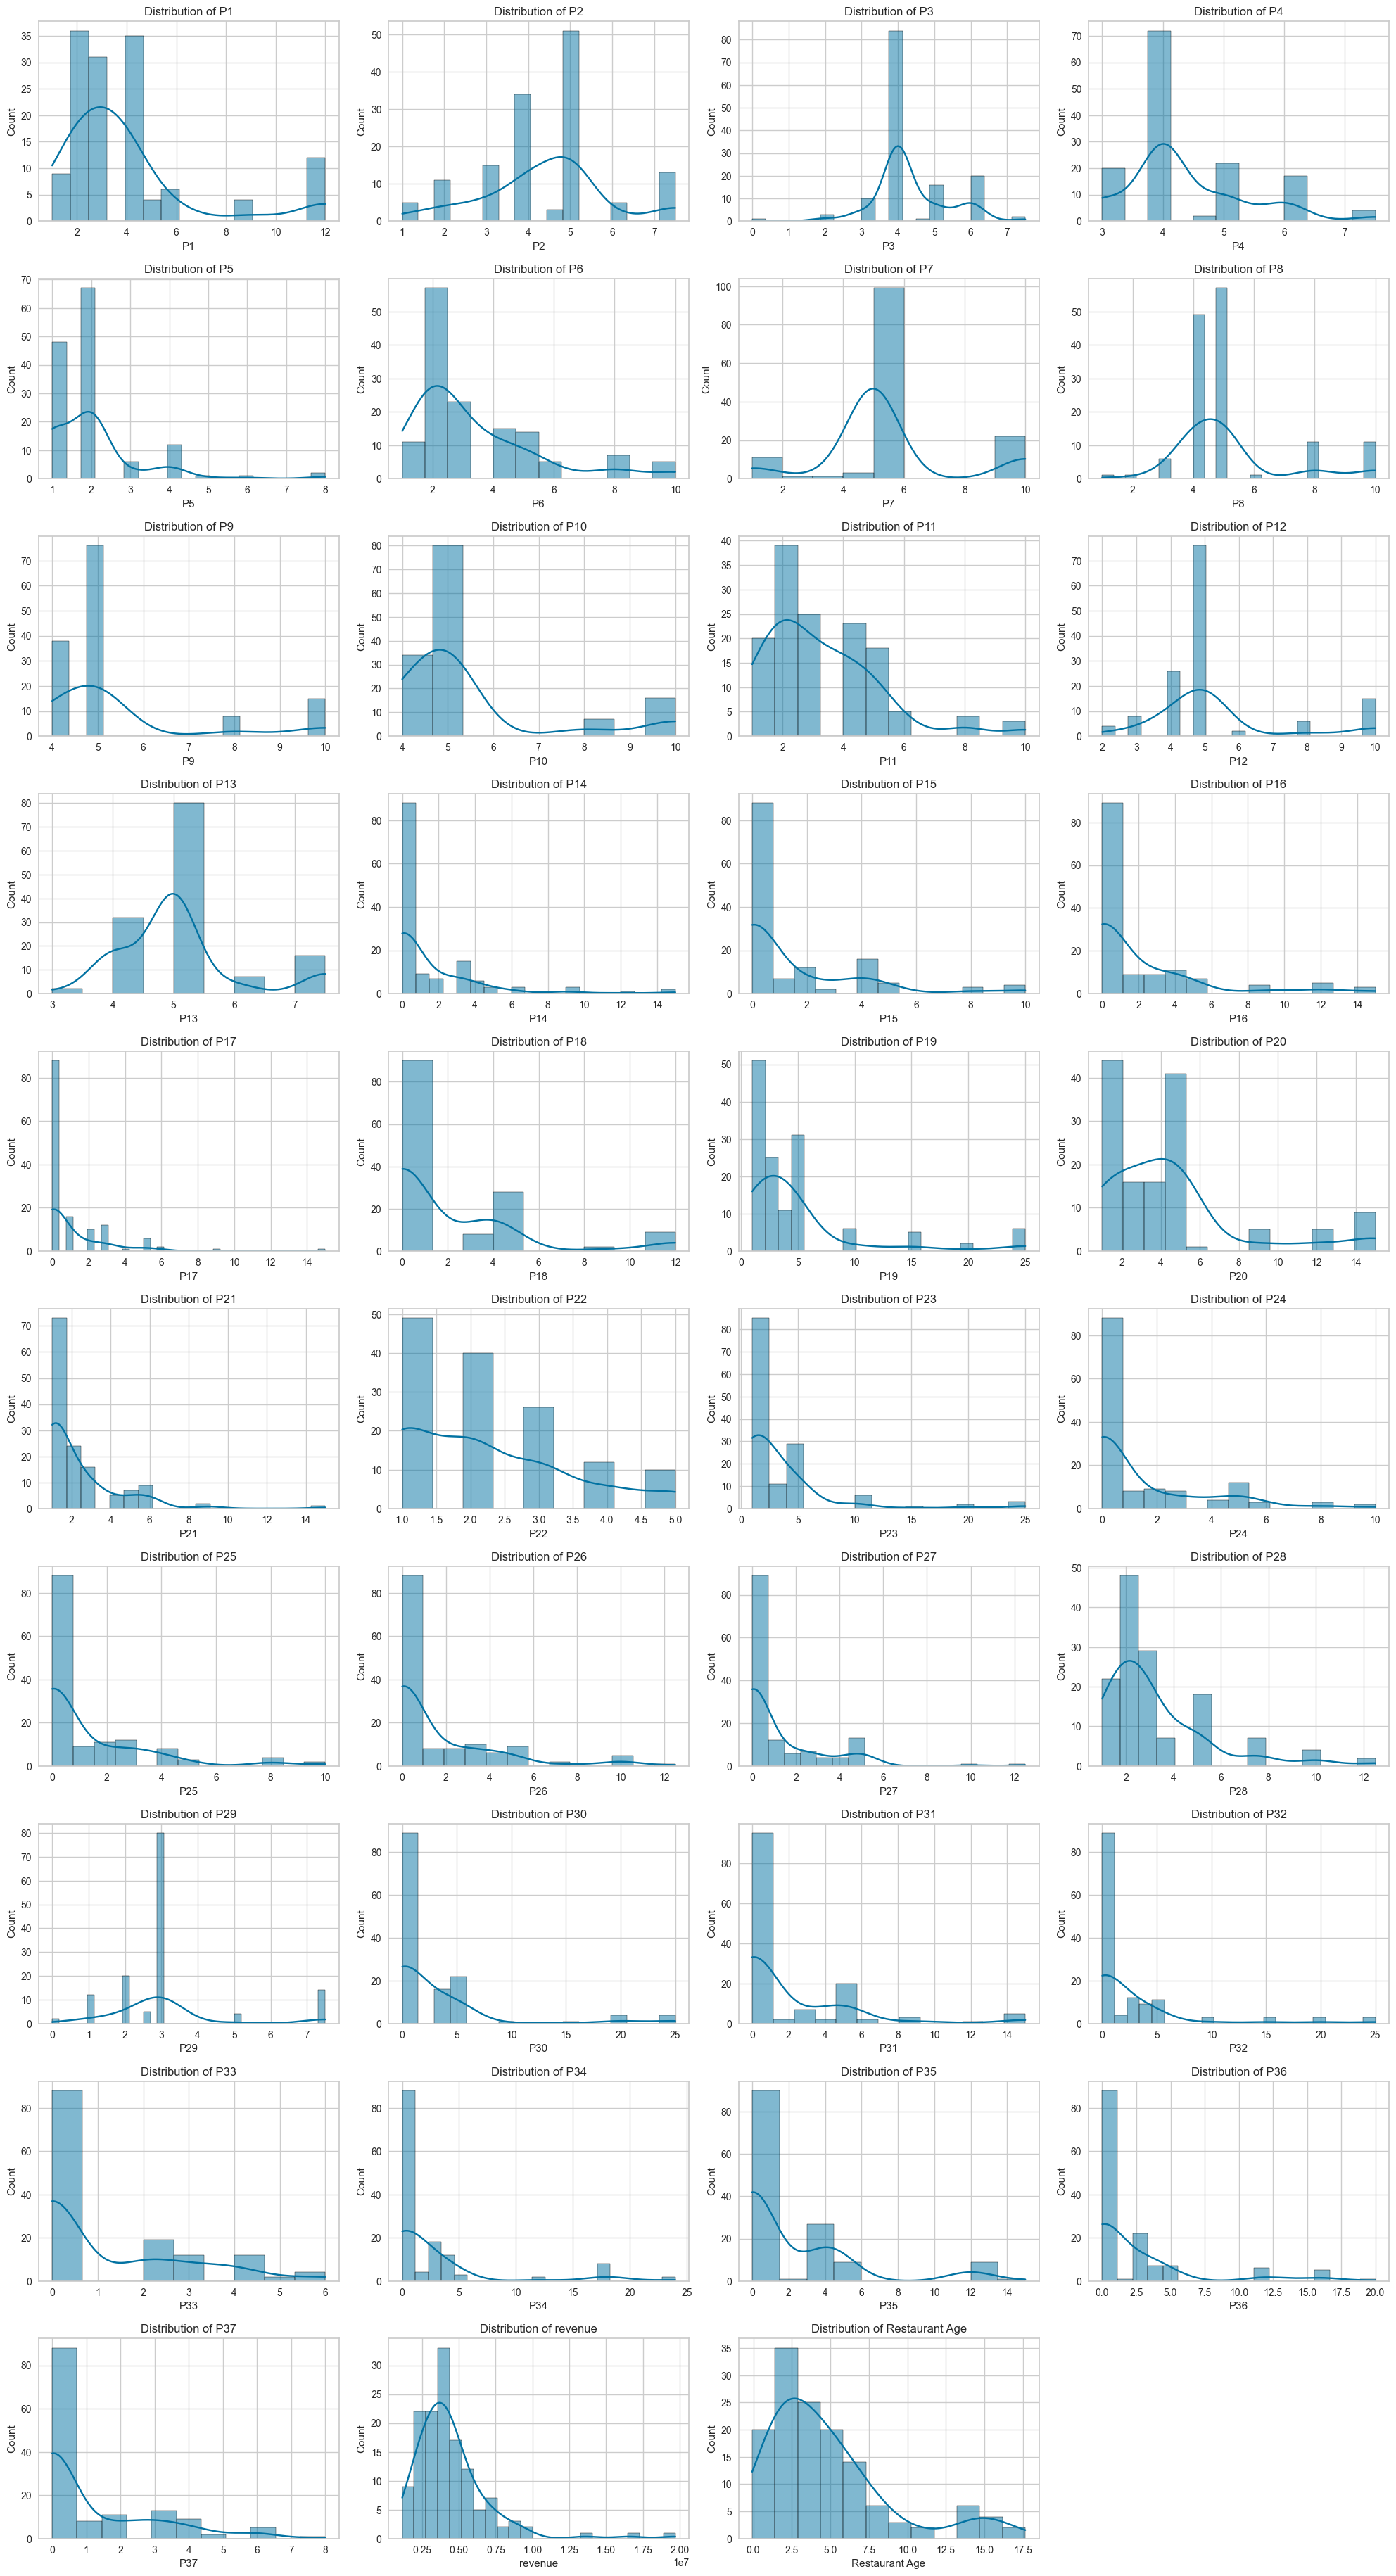

In [28]:
# Define the columns to explore (columns 3 to 42)
columns_to_explore = df_train.columns[3:42]

# Set the figure size for the grid of plots
plt.figure(figsize=(20, 40))

# Loop through the columns and plot the distribution
for i, col in enumerate(columns_to_explore, 1):
    plt.subplot(11, 4, i)  # 11 rows, 4 columns
    sns.histplot(df_train[col], kde=True)  # Histogram with KDE overlay
    plt.title(f'Distribution of {col}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [29]:
# Identifying the skewness of the features
skewness = df_train[df_train.columns[3:]].skew()

# Identify left-skewed features (setting skewness < -0.5 as the threshold)
left_skewed_features = skewness[skewness < -0.5]
right_skewed_features = skewness[skewness > 0.5]

# Display the left-skewed features and their skewness values
print("Left-Skewed Features:")
print(left_skewed_features)

# Display the right-skewed features and their skewness values
print("\nRight-Skewed Features:")
print(right_skewed_features)

Left-Skewed Features:
Series([], dtype: float64)

Right-Skewed Features:
P1                1.841412
P4                1.035630
P5                2.414260
P6                1.562815
P7                0.669055
P8                1.474332
P9                1.726721
P10               1.724929
P11               1.324262
P12               1.403638
P13               1.164095
P14               2.879644
P15               2.011790
P16               2.223015
P17               3.451736
P18               1.973559
P19               2.503242
P20               1.642048
P21               2.729971
P22               0.806967
P23               3.276060
P24               1.774883
P25               2.200606
P26               2.149265
P27               2.456601
P28               1.920551
P29               1.541544
P30               2.879599
P31               2.288791
P32               2.916353
P33               1.241610
P34               2.719279
P35               1.985279
P36               2.433065
P37      

Most of our data are right skewed.

---

# 3. Modeling

#### 3.1 Creating a Baseline Model

In [30]:
# Split the data into features and target
X_bl = df_train.drop(columns=['Id', 'City', 'Open Date', 'revenue', 'Restaurant Age'])
y_bl = df_train['revenue']

# Split the data into training and validation sets
X_train_bl, X_val_bl, y_train_bl, y_val_bl = train_test_split(X_bl, y_bl, test_size=0.2, random_state=42)

# Display the shapes of the training and validation sets
X_train_bl.shape, X_val_bl.shape, y_train_bl.shape, y_val_bl.shape

((109, 41), (28, 41), (109,), (28,))

In [31]:
# Using linear regression to create a baseline model
# Initialize the model
lr = LinearRegression()

# Fit the model
lr.fit(X_train_bl, y_train_bl)

# Make predictions
y_pred_bl = lr.predict(X_val_bl)

# Calculate the RMSE
rmse_bl = mean_squared_error(y_val_bl, y_pred_bl, squared=False)
print(f"Baseline RMSE: {rmse_bl}")





Baseline RMSE: 4440097.783961152


The baseline model gives us an RMSE of 4440097.783961152.

#### 3.2 Transforming P1 - P37 'Obfuscated' data
Since P1 - P37 are 'obfuscated' data of:  
###### **Demographic data** are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. <br> **Real estate data** mainly relate to the m2 of the location, front facade of the location, car park availability. <br>**Commercial data** mainly include the existence of points of interest including schools, banks, other QSR operators.
the value '0' might represent missing values after the obfuscation process.

<br> We will try treating them as missing values instead of '0' and perform imputation. 

In [32]:
# Step 1: Replace 0 values with NaN in columns 'P1' to 'P37'
columns_to_impute = [f'P{i}' for i in range(1, 38)]  # List of column names from 'P1' to 'P37'
df_train[columns_to_impute] = df_train[columns_to_impute].replace(0, np.nan)

# Step 2: Perform train-test split
X = df_train.drop(['Id', 'revenue', 'Open Date', 'City'], axis=1)  # Features (excluding target 'revenue')
y = df_train['revenue']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply MICE imputation on the training data
imputer = IterativeImputer(random_state=42)

# Fit the imputer on the training set and transform the training set
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test set using the imputer trained on the training set
X_test_imputed = imputer.transform(X_test)

# Step 4: Round the imputed values to ensure they are whole numbers (integers)
X_train_imputed = np.round(X_train_imputed)
X_train_imputed[X_train_imputed < 1] = 1  # Set a minimum threshold of 1
X_test_imputed = np.round(X_test_imputed)
X_test_imputed[X_test_imputed < 1] = 1  # Set a minimum threshold of 1

# Convert the imputed data back into DataFrames for easy handling
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_test.columns)


Duplicating a copy of the imputed data to prepare a dataframe to use with pycaret.

In [33]:
# Step 1: Combine the imputed training data with the target variable
df_train_pycaret = X_train_imputed_df.copy()
df_train_pycaret['revenue'] = y_train.reset_index(drop=True)  # Add the target variable

df_train_pycaret.head()


,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,Restaurant Age,Type_fc,Type_il,Type_mb,City Group_other,revenue
0,9.0,6.0,6.0,6.0,4.0,4.0,10.0,8.0,10.0,10.0,8.0,10.0,8.0,12.0,7.0,12.0,6.0,14.0,25.0,15.0,15.0,3.0,20.0,6.0,5.0,7.0,4.0,10.0,2.0,24.0,11.0,18.0,6.0,21.0,15.0,15.0,4.0,1.0,1.0,1.0,1.0,1.0,3745135.0
1,3.0,4.0,3.0,4.0,2.0,1.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,2.0,3.0,4.0,2.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,2.0,3.0,1.0,4.0,5.0,3.0,2.0,1.0,4.0,3.0,2.0,1.0,1.0,1.0,1.0,3376145.0
2,2.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,3.0,3.0,3.0,2.0,4.0,5.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,7.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,2.0,1.0,1.0,1.0,1.0,3273041.0
3,2.0,4.0,4.0,4.0,2.0,5.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,2.0,2.0,5.0,2.0,4.0,2.0,5.0,1.0,1.0,3.0,5.0,2.0,3.0,5.0,3.0,3.0,5.0,5.0,4.0,2.0,3.0,4.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0,5161370.0
4,4.0,5.0,5.0,4.0,2.0,2.0,5.0,4.0,5.0,5.0,3.0,5.0,5.0,3.0,4.0,3.0,1.0,3.0,5.0,5.0,4.0,5.0,5.0,3.0,3.0,3.0,2.0,4.0,1.0,5.0,3.0,3.0,2.0,3.0,4.0,3.0,1.0,5.0,1.0,1.0,1.0,1.0,4155435.0


In [34]:
# Creating the final dataframe for test data with the same imputer

df_test[columns_to_impute] = df_test[columns_to_impute].replace(0, np.nan) # Performing the same transformations on the test data

df_test_1 = df_test.drop(columns=['Id','Open Date', 'City'])
df_test_imputed = imputer.transform(df_test_1) # Fitting the same imputer on the test data
df_test_imputed = np.round(df_test_imputed)

final_df = pd.DataFrame(df_test_imputed, columns=df_test_1.columns)




Performing log transformation for P1 - P37 since most of the data are right skewed. We only use P1-P37 as they are the original numerical features besides revenue.

In [35]:
# Creating a copy of the train data
df_train_pycaret2 = df_train_pycaret.copy()

# Log transformation of the features in P1 : P37
columns_to_log = [f'P{i}' for i in range(1,38)]  # create a list of 'P1' to 'P37' column names

for feature in columns_to_log:
    df_train_pycaret2[feature] = np.log1p(df_train_pycaret2[feature]) # Apply log transformation to each feature




In [36]:
df_train_pycaret2.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,Restaurant Age,Type_fc,Type_il,Type_mb,City Group_other,revenue
0,2.302585,1.945910,1.945910,1.945910,1.609438,1.609438,2.397895,2.197225,2.397895,2.397895,2.197225,2.397895,2.197225,2.564949,2.079442,2.564949,1.945910,2.708050,3.258097,2.772589,2.772589,1.386294,3.044522,1.945910,1.791759,2.079442,1.609438,2.397895,1.098612,3.218876,2.484907,2.944439,1.945910,3.091042,2.772589,2.772589,1.609438,1.0,1.0,1.0,1.0,1.0,3745135.0
1,1.386294,1.609438,1.386294,1.609438,1.098612,0.693147,1.791759,1.791759,1.791759,1.791759,1.098612,1.791759,1.791759,1.098612,1.386294,1.609438,1.098612,1.791759,1.386294,0.693147,0.693147,0.693147,0.693147,1.386294,1.386294,1.386294,1.386294,1.098612,1.386294,0.693147,1.609438,1.791759,1.386294,1.098612,0.693147,1.609438,1.386294,2.0,1.0,1.0,1.0,1.0,3376145.0
2,1.098612,1.098612,1.609438,1.609438,1.098612,1.098612,1.609438,1.609438,1.791759,1.791759,1.609438,1.791759,1.791759,1.386294,1.386294,1.386294,1.098612,1.609438,1.791759,1.609438,1.098612,0.693147,1.098612,1.098612,1.098612,1.098612,1.386294,0.693147,1.386294,2.079442,1.609438,1.609438,1.386294,1.609438,1.609438,1.609438,1.609438,2.0,1.0,1.0,1.0,1.0,3273041.0
3,1.098612,1.609438,1.609438,1.609438,1.098612,1.791759,1.791759,1.791759,1.791759,1.791759,1.098612,1.791759,1.791759,1.098612,1.098612,1.791759,1.098612,1.609438,1.098612,1.791759,0.693147,0.693147,1.386294,1.791759,1.098612,1.386294,1.791759,1.386294,1.386294,1.791759,1.791759,1.609438,1.098612,1.386294,1.609438,1.609438,1.098612,2.0,1.0,1.0,1.0,1.0,5161370.0
4,1.609438,1.791759,1.791759,1.609438,1.098612,1.098612,1.791759,1.609438,1.791759,1.791759,1.386294,1.791759,1.791759,1.386294,1.609438,1.386294,0.693147,1.386294,1.791759,1.791759,1.609438,1.791759,1.791759,1.386294,1.386294,1.386294,1.098612,1.609438,0.693147,1.791759,1.386294,1.386294,1.098612,1.386294,1.609438,1.386294,0.693147,5.0,1.0,1.0,1.0,1.0,4155435.0


#### 3.3 Dealing with Outliers

Previously we observed that there were a total of 88 out of 137 rows that will be affected by outliers, hence we cannot simply remove all outliers. However, perhaps we can remove the restaurants with 'revenue' outliers only. 

In [37]:
# Finding out outliers in the 'revenue' column
outliers_revenue = find_outliers_iqr(df_train_pycaret2, 'revenue')
outliers_revenue

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,Restaurant Age,Type_fc,Type_il,Type_mb,City Group_other,revenue
13,1.791759,1.791759,1.386294,1.791759,1.098612,1.098612,1.791759,1.791759,1.791759,1.609438,1.098612,1.791759,1.609438,1.609438,1.609438,1.609438,1.791759,1.609438,1.791759,1.791759,1.098612,1.098612,1.386294,1.098612,1.098612,1.098612,1.791759,1.386294,1.098612,1.791759,1.791759,1.609438,1.609438,1.609438,1.609438,1.791759,1.098612,4.0,1.0,1.0,1.0,1.0,8904084.0
41,2.564949,2.197225,1.945910,1.945910,1.098612,2.197225,2.397895,2.397895,2.397895,2.397895,1.609438,2.397895,2.197225,1.945910,2.197225,2.564949,1.386294,2.564949,2.772589,1.386294,1.386294,1.386294,1.791759,1.945910,2.197225,2.397895,1.386294,2.197225,2.197225,1.791759,2.564949,2.995732,1.609438,2.639057,0.693147,2.708050,1.945910,6.0,1.0,1.0,1.0,1.0,8630682.0
80,1.791759,1.791759,1.609438,1.791759,0.693147,1.609438,1.791759,1.386294,1.609438,1.609438,1.791759,1.386294,1.609438,1.791759,1.609438,1.609438,1.386294,1.386294,1.791759,1.791759,1.791759,1.791759,1.609438,1.609438,1.609438,1.791759,1.386294,1.791759,0.693147,1.386294,1.791759,1.791759,1.386294,1.386294,0.693147,1.609438,1.098612,8.0,1.0,1.0,1.0,1.0,16549064.0
96,1.609438,1.791759,1.609438,1.609438,1.098612,1.609438,1.791759,1.609438,1.609438,1.609438,1.791759,1.386294,1.609438,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.386294,0.693147,1.791759,1.791759,1.791759,0.693147,1.791759,0.693147,1.791759,1.791759,1.609438,1.098612,1.791759,1.791759,1.791759,1.386294,14.0,1.0,1.0,1.0,1.0,13575224.0
97,1.098612,1.609438,1.609438,1.609438,1.098612,1.098612,1.791759,1.609438,1.609438,1.791759,1.386294,1.609438,1.791759,1.098612,1.386294,1.609438,1.098612,1.609438,1.098612,1.098612,0.693147,0.693147,0.693147,1.609438,1.386294,1.386294,1.386294,1.386294,1.386294,0.693147,1.609438,1.386294,1.098612,0.693147,0.693147,1.609438,1.386294,2.0,1.0,1.0,1.0,1.0,8894598.0


There are only 5 rows that will be removed. 

In [38]:
# Dropping rows with outliers in the 'revenue' column since there are only 5 of them
df_train_pycaret2 = df_train_pycaret2.drop(outliers_revenue.index)


#### 3.4 Training & Evaluation with PyCaret

With the data ready, we pass through pycaret to find a suitable model. We also introduce polynomial features as from our domain knowledge we know that for the restaurant business, the success is influenced by a combination of different aspects such as the right location, crowd/customers, menu pricing etc.    

In [39]:
# Passing through the transformed data to PyCaret 
reg_setup_poly = setup(data=df_train_pycaret2.drop('Restaurant Age', axis=1), # Dropping 'Restaurant Age' column since problem purpose is to help predict revenue for new restaurants
                  target='revenue',  # Target variable
                  session_id=42,  # For reproducibility
                  polynomial_features=True,  # Apply polynomial features
                  polynomial_degree=2,  # Degree of polynomial features
                  transformation=True,  # Apply transformation (e.g., log, sqrt) to features if needed
                  normalize=True,  # Normalize features
                  normalize_method='robust',  # applying robust scaling
                  remove_outliers=False,  # Remove outliers from the data
                  categorical_features=['Type_fc', 'Type_il', 'Type_mb'] # Categorical features
                  )

# Compare models and select the best one
best_model = compare_models(sort='RMSE')

# Output the best model found
print(best_model)

# tuning the best model
tuned_best_model = tune_model(best_model,optimize='RMSE')

,Description,Value
0,Session id,42
1,Target,revenue
2,Target type,Regression
3,Original data shape,"(104, 42)"
4,Transformed data shape,"(104, 903)"
5,Transformed train set shape,"(72, 903)"
6,Transformed test set shape,"(32, 903)"
7,Numeric features,38
8,Categorical features,3
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,1163198.0130,2065701076601.5168,1378434.7678,-0.0496,0.3665,0.3568,0.2460
lightgbm,Light Gradient Boosting Machine,1170568.2763,2048950885844.7117,1380674.0060,-0.0625,0.3704,0.3523,0.2560
rf,Random Forest Regressor,1190700.9438,2133868240553.4165,1398837.8309,-0.1184,0.3798,0.3685,0.3780
llar,Lasso Least Angle Regression,1260457.8913,2488632546032.4775,1494355.2790,-0.5911,0.4452,0.3868,0.1870
et,Extra Trees Regressor,1304302.2614,2455144770288.9497,1501287.5284,-0.2281,0.4049,0.3988,0.3170
knn,K Neighbors Regressor,1290496.8875,2430402881126.3999,1502016.3188,-0.3383,0.4066,0.4023,0.2040
dummy,Dummy Regressor,1277921.5812,2552590283571.2002,1530418.0062,-0.1818,0.4158,0.4152,0.1990
br,Bayesian Ridge,1277921.6180,2552590310348.8633,1530418.0379,-0.1818,0.4158,0.4152,0.2700
xgboost,Extreme Gradient Boosting,1321747.1125,2451119171174.3999,1533161.1250,-0.4872,0.3993,0.3817,0.5510
gbr,Gradient Boosting Regressor,1359002.1862,2612460701925.3291,1562835.5134,-0.5360,0.4055,0.3995,0.2910


AdaBoostRegressor(random_state=42)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,772419.1964,1060886084107.7419,1029993.2447,-0.0754,0.2740,0.1928
1,862259.7234,941200486264.4583,970154.8775,0.5078,0.2956,0.2772
2,801297.3728,773458272670.2637,879464.7649,-1.1960,0.2430,0.2309
3,1481584.9225,2771497551560.2500,1664781.5327,0.3553,0.4300,0.4539
4,1200422.9292,1722399942140.2498,1312402.3553,0.2192,0.3723,0.3790
5,1030759.6609,1558967729589.8052,1248586.2924,-0.2116,0.2517,0.2251
6,1328222.9586,2698935717749.4717,1642843.7898,0.1737,0.5361,0.5756
7,1044169.4296,2126145459825.9480,1458130.8103,0.3594,0.4176,0.3764
8,1969225.9487,5013204326354.8203,2239018.6079,-0.1269,0.5407,0.5620


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [40]:
# Log transformation of the features in P1 : P37 in X_test_imputed_df
for feature in columns_to_log:
    X_test_imputed_df[feature] = np.log1p(X_test_imputed_df[feature])

In [41]:
# Predicting the validation data
y_pred = predict_model(tuned_best_model, data=X_test_imputed_df)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred['prediction_label'], squared=False)
print(f'Best model - {tuned_best_model} RMSE: {rmse}')

Best model - AdaBoostRegressor(random_state=42) RMSE: 3355553.1894117515


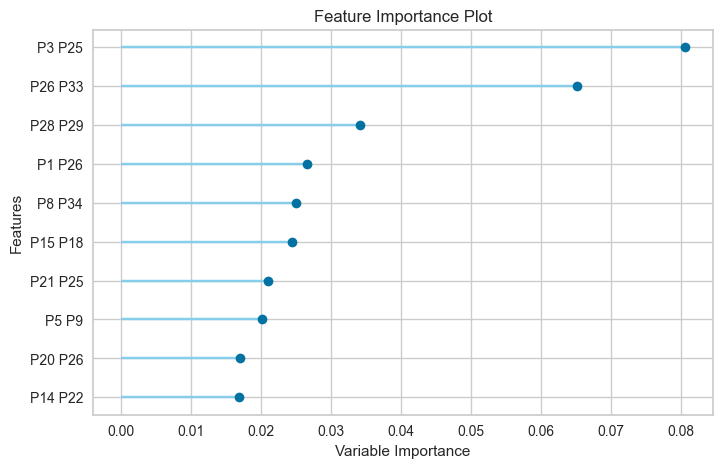

In [42]:
# Finding out top 10 feature importances
plot_model(tuned_best_model, plot='feature')

#### 3.5 Feature Importance
From the observations we can determine that the combination of P3 x P25(~8%) and P26 x P33(6.5%), holds high relations to revenue of the restaurants. The company can consider looking into/place higher importance in these features to increase the rate of success for the restaurants.  

In [43]:
# Getting the parameters of our best model
best_model_params = tuned_best_model.get_params()
best_model_params


{'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 42}

##### Manually training the best model

In [45]:
# Saving best model to a file

save_model(tuned_best_model, f'{tuned_best_model}')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['P1', 'P2', 'P3', 'P4', 'P5', 'P6',
                                              'P7', 'P8', 'P9', 'P10', 'P11',
                                              'P12', 'P13', 'P14', 'P15', 'P16',
                                              'P17', 'P18', 'P19', 'P20', 'P21',
                                              'P22', 'P23', 'P24', 'P25', 'P26',
                                              'P27', 'P28', 'P29', 'P30', ...],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=...
                 ('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('transformation',
                  TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                 ('norma

In [46]:
tuned_best_model.get_params()

{'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 42}

---

##### Performing the same transformations to the Test Dataset

In [47]:
# Preparing actual test data for prediction
df_test_2 = df_test.drop(columns=['Id','Open Date', 'City'])
df_test_imputed2 = imputer.transform(df_test_2) # Fitting the same imputer on the test data
df_test_imputed2 = np.round(df_test_imputed2) # Rounding the imputed values
df_test_imputed2[df_test_imputed2 < 1] = 1  # Set a minimum threshold of 1

# Converting the imputed data back into a DataFrame for easier handling
df_test_imputed2 = pd.DataFrame(df_test_imputed2, columns=df_test_2.columns)
  
# Performing log transformation on the features in the test data columns
for feature in columns_to_log:
    df_test_imputed2[feature] = np.log1p(df_test_imputed2[feature])

# Saving df_test_imputed2 to a csv file for future use
df_test_imputed2.to_csv('df_test_imputed2.csv', index=False)

#### 4. Predicting 'Revenue' on Test Dataset with Final Model

In [48]:
# Making the predictions on the final test data
predictions = predict_model(tuned_best_model, data=df_test_imputed2)
predictions_submission = pd.DataFrame({'Id': df_test['Id'], 'Prediction': predictions['prediction_label']})
print(predictions_submission.head())

# Saving submission to csv file
predictions_submission.to_csv('predictions.csv', index=False)

   Id    Prediction
0   0  4.122087e+06
1   1  4.172527e+06
2   2  4.166266e+06
3   3  4.242953e+06
4   4  4.840719e+06


In [50]:
df_test_imputed2.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P33,P34,P35,P36,P37,Restaurant Age,Type_fc,Type_il,Type_mb,City Group_other
0,0.693147,1.609438,1.609438,1.609438,0.693147,1.098612,1.791759,1.609438,1.791759,1.791759,...,1.386294,1.386294,1.386294,1.609438,1.386294,3.0,1.0,1.0,1.0,1.0
1,1.386294,1.609438,1.609438,1.609438,1.098612,1.098612,1.791759,1.386294,1.609438,1.609438,...,1.386294,1.609438,1.945910,1.386294,1.098612,3.0,1.0,1.0,1.0,1.0
2,1.386294,1.609438,1.609438,1.609438,1.098612,1.098612,1.791759,1.609438,1.609438,1.791759,...,1.386294,1.609438,1.791759,1.609438,1.098612,1.0,1.0,1.0,1.0,1.0
3,1.098612,1.609438,1.609438,1.609438,1.098612,1.386294,1.791759,1.609438,1.791759,1.609438,...,1.386294,1.386294,1.609438,1.609438,1.386294,1.0,1.0,1.0,1.0,1.0
4,1.098612,1.609438,1.609438,1.609438,0.693147,1.098612,1.791759,1.609438,1.791759,1.609438,...,1.386294,1.386294,1.609438,1.609438,1.386294,1.0,1.0,1.0,1.0,1.0


In [52]:
# Making the predictions on the final test data using best AdaBoost model
predictions_ada = best_ada.predict(df_test_imputed2.drop('Restaurant Age', axis=1))
predictions_submission_ada = pd.DataFrame({'Id': df_test['Id'], 'Prediction': predictions_ada})

# Saving submission to csv file
predictions_submission_ada.to_csv('predictions_ada.csv', index=False)

---
Creating a requirements file for import of packages and cleaning up

In [58]:
# Extracting the packages to a requirements.txt file
!pip freeze > requirements.txt


In [58]:
# Performing clean up and garbage collection to free up memory
import shutil
import os
import psutil
import gc

gc.collect() # Garbage collect to free up memory

# Remove MLflow logs (if applicable)
log_dir = 'mlruns'  # Path where PyCaret/MLflow logs are stored
if os.path.exists(log_dir):
    shutil.rmtree(log_dir)  # Deletes the log directory and its contents

# Check memory usage of the current process (in MB)
process = psutil.Process()
memory_usage_MB = process.memory_info().rss / (1024 * 1024)
print(f"Memory usage: {memory_usage_MB:.2f} MB")